In [9]:

%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display
import stanford_mir; stanford_mir.init()

In [13]:
kick_signals = [
    librosa.load(p)[0] for p in Path().glob('../Audios/*.wav')
]


In [25]:
len(kick_signals)


58

In [26]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(kick_signals):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

ValueError: num must be 1 <= num <= 10, not 11

In [27]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
    ]

In [28]:
kick_features = numpy.array([extract_features(x) for x in kick_signals])

Text(0, 0.5, 'Count')

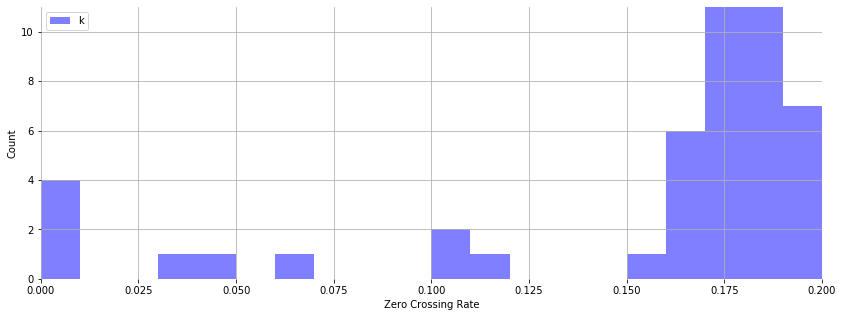

In [29]:
plt.figure(figsize=(14, 5))
plt.hist(kick_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
# plt.hist(snare_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('kicks'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

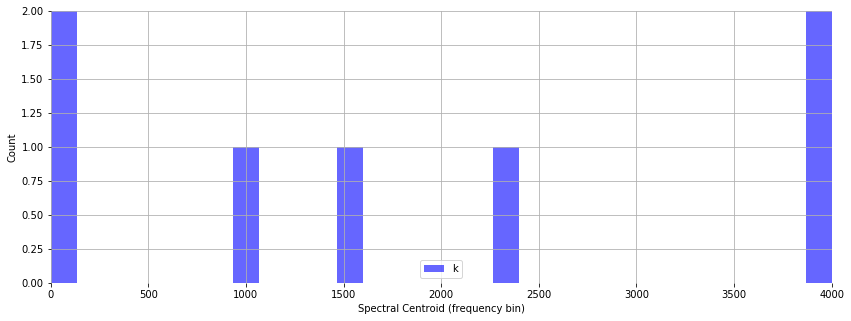

In [31]:
plt.figure(figsize=(14, 5))
plt.hist(kick_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
# plt.hist(snare_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('kicks'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [ ]:
feature_table = numpy.vstack((kick_features))
print(feature_table.shape)

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

In [ ]:
plt.scatter(training_features[:10,0], training_features[:10,1], c='b')
plt.scatter(training_features[10:,0], training_features[10:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')